## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9988682	total: 62.1ms	remaining: 1m 2s
1:	learn: 0.9810118	total: 63ms	remaining: 31.5s
2:	learn: 0.9603896	total: 63.9ms	remaining: 21.2s
3:	learn: 0.9426049	total: 64.7ms	remaining: 16.1s
4:	learn: 0.9252516	total: 65.6ms	remaining: 13.1s
5:	learn: 0.9074753	total: 66.3ms	remaining: 11s
6:	learn: 0.8910320	total: 67.1ms	remaining: 9.51s
7:	learn: 0.8738340	total: 67.9ms	remaining: 8.41s
8:	learn: 0.8582925	total: 69.9ms	remaining: 7.7s
9:	learn: 0.8427431	total: 70.8ms	remaining: 7s
10:	learn: 0.8296929	total: 71.7ms	remaining: 6.45s
11:	learn: 0.8156349	total: 73.9ms	remaining: 6.08s
12:	learn: 0.8016414	total: 74.9ms	remaining: 5.69s
13:	learn: 0.7870312	total: 76.2ms	remaining: 5.37s
14:	learn: 0.7750184	total: 77.7ms	remaining: 5.1s
15:	learn: 0.7598897	total: 79.5ms	remaining: 4.89s
16:	learn: 0.7485731	total: 81.9ms	remaining: 4.73s
17:	learn: 0.7359598	total: 84.9ms	remaining: 4.63s
18:	learn: 0.7234375	total: 87.5ms	remaining: 4.52s
1

24:	learn: 0.6572773	total: 96.4ms	remaining: 3.76s
25:	learn: 0.6472280	total: 97.3ms	remaining: 3.64s
26:	learn: 0.6384653	total: 98.1ms	remaining: 3.54s
27:	learn: 0.6294003	total: 98.9ms	remaining: 3.43s
28:	learn: 0.6198451	total: 99.7ms	remaining: 3.34s
29:	learn: 0.6098980	total: 101ms	remaining: 3.25s
30:	learn: 0.6014249	total: 101ms	remaining: 3.17s
31:	learn: 0.5927543	total: 102ms	remaining: 3.1s
32:	learn: 0.5861245	total: 103ms	remaining: 3.03s
33:	learn: 0.5781172	total: 105ms	remaining: 3s
34:	learn: 0.5705289	total: 107ms	remaining: 2.94s
35:	learn: 0.5631602	total: 108ms	remaining: 2.9s
36:	learn: 0.5570177	total: 109ms	remaining: 2.84s
37:	learn: 0.5492956	total: 110ms	remaining: 2.79s
38:	learn: 0.5417223	total: 114ms	remaining: 2.81s
39:	learn: 0.5338700	total: 115ms	remaining: 2.76s
40:	learn: 0.5282605	total: 116ms	remaining: 2.71s
41:	learn: 0.5225017	total: 117ms	remaining: 2.66s
42:	learn: 0.5162326	total: 117ms	remaining: 2.61s
43:	learn: 0.5094980	total: 118

103:	learn: 0.3168705	total: 191ms	remaining: 1.65s
104:	learn: 0.3157923	total: 192ms	remaining: 1.64s
105:	learn: 0.3137842	total: 193ms	remaining: 1.63s
106:	learn: 0.3123690	total: 193ms	remaining: 1.61s
107:	learn: 0.3103131	total: 194ms	remaining: 1.6s
108:	learn: 0.3089821	total: 195ms	remaining: 1.59s
109:	learn: 0.3076972	total: 196ms	remaining: 1.58s
110:	learn: 0.3060160	total: 197ms	remaining: 1.58s
111:	learn: 0.3045882	total: 198ms	remaining: 1.57s
112:	learn: 0.3030393	total: 198ms	remaining: 1.56s
113:	learn: 0.3018114	total: 199ms	remaining: 1.55s
114:	learn: 0.3009181	total: 200ms	remaining: 1.54s
115:	learn: 0.2999064	total: 201ms	remaining: 1.53s
116:	learn: 0.2987362	total: 201ms	remaining: 1.52s
117:	learn: 0.2977527	total: 203ms	remaining: 1.52s
118:	learn: 0.2965347	total: 204ms	remaining: 1.51s
119:	learn: 0.2951182	total: 205ms	remaining: 1.5s
120:	learn: 0.2940147	total: 205ms	remaining: 1.49s
121:	learn: 0.2929081	total: 206ms	remaining: 1.48s
122:	learn: 0.

200:	learn: 0.2286686	total: 289ms	remaining: 1.15s
201:	learn: 0.2281237	total: 290ms	remaining: 1.15s
202:	learn: 0.2275141	total: 291ms	remaining: 1.14s
203:	learn: 0.2271273	total: 292ms	remaining: 1.14s
204:	learn: 0.2264165	total: 294ms	remaining: 1.14s
205:	learn: 0.2257047	total: 295ms	remaining: 1.14s
206:	learn: 0.2252442	total: 296ms	remaining: 1.13s
207:	learn: 0.2244335	total: 299ms	remaining: 1.14s
208:	learn: 0.2238654	total: 300ms	remaining: 1.14s
209:	learn: 0.2231717	total: 301ms	remaining: 1.13s
210:	learn: 0.2225834	total: 303ms	remaining: 1.13s
211:	learn: 0.2222016	total: 304ms	remaining: 1.13s
212:	learn: 0.2215286	total: 305ms	remaining: 1.13s
213:	learn: 0.2208226	total: 306ms	remaining: 1.13s
214:	learn: 0.2200348	total: 308ms	remaining: 1.12s
215:	learn: 0.2193933	total: 309ms	remaining: 1.12s
216:	learn: 0.2187983	total: 310ms	remaining: 1.12s
217:	learn: 0.2180630	total: 312ms	remaining: 1.12s
218:	learn: 0.2174459	total: 313ms	remaining: 1.12s
219:	learn: 

280:	learn: 0.1870362	total: 384ms	remaining: 983ms
281:	learn: 0.1868238	total: 385ms	remaining: 981ms
282:	learn: 0.1866166	total: 387ms	remaining: 982ms
283:	learn: 0.1864202	total: 389ms	remaining: 980ms
284:	learn: 0.1858375	total: 390ms	remaining: 978ms
285:	learn: 0.1854881	total: 391ms	remaining: 976ms
286:	learn: 0.1852833	total: 392ms	remaining: 974ms
287:	learn: 0.1848731	total: 393ms	remaining: 972ms
288:	learn: 0.1844534	total: 395ms	remaining: 972ms
289:	learn: 0.1839132	total: 396ms	remaining: 970ms
290:	learn: 0.1834436	total: 397ms	remaining: 968ms
291:	learn: 0.1830136	total: 398ms	remaining: 965ms
292:	learn: 0.1826476	total: 399ms	remaining: 963ms
293:	learn: 0.1822056	total: 400ms	remaining: 960ms
294:	learn: 0.1816518	total: 401ms	remaining: 957ms
295:	learn: 0.1812721	total: 402ms	remaining: 957ms
296:	learn: 0.1809488	total: 403ms	remaining: 954ms
297:	learn: 0.1807020	total: 404ms	remaining: 951ms
298:	learn: 0.1801882	total: 404ms	remaining: 948ms
299:	learn: 

378:	learn: 0.1547962	total: 481ms	remaining: 789ms
379:	learn: 0.1544309	total: 482ms	remaining: 787ms
380:	learn: 0.1541319	total: 483ms	remaining: 785ms
381:	learn: 0.1540517	total: 484ms	remaining: 783ms
382:	learn: 0.1537978	total: 486ms	remaining: 783ms
383:	learn: 0.1534692	total: 487ms	remaining: 781ms
384:	learn: 0.1531024	total: 488ms	remaining: 779ms
385:	learn: 0.1527783	total: 489ms	remaining: 777ms
386:	learn: 0.1524076	total: 489ms	remaining: 775ms
387:	learn: 0.1521094	total: 491ms	remaining: 774ms
388:	learn: 0.1518708	total: 491ms	remaining: 772ms
389:	learn: 0.1516056	total: 492ms	remaining: 770ms
390:	learn: 0.1514357	total: 493ms	remaining: 768ms
391:	learn: 0.1513226	total: 494ms	remaining: 766ms
392:	learn: 0.1509903	total: 495ms	remaining: 765ms
393:	learn: 0.1506466	total: 496ms	remaining: 764ms
394:	learn: 0.1503813	total: 497ms	remaining: 762ms
395:	learn: 0.1500346	total: 498ms	remaining: 760ms
396:	learn: 0.1497461	total: 499ms	remaining: 758ms
397:	learn: 

470:	learn: 0.1319222	total: 577ms	remaining: 648ms
471:	learn: 0.1316692	total: 578ms	remaining: 646ms
472:	learn: 0.1314648	total: 579ms	remaining: 645ms
473:	learn: 0.1312054	total: 580ms	remaining: 643ms
474:	learn: 0.1310179	total: 581ms	remaining: 642ms
475:	learn: 0.1307700	total: 582ms	remaining: 641ms
476:	learn: 0.1306001	total: 583ms	remaining: 639ms
477:	learn: 0.1304387	total: 584ms	remaining: 637ms
478:	learn: 0.1302765	total: 585ms	remaining: 636ms
479:	learn: 0.1300921	total: 585ms	remaining: 634ms
480:	learn: 0.1298274	total: 586ms	remaining: 632ms
481:	learn: 0.1297212	total: 587ms	remaining: 631ms
482:	learn: 0.1295198	total: 589ms	remaining: 630ms
483:	learn: 0.1291768	total: 590ms	remaining: 629ms
484:	learn: 0.1290763	total: 592ms	remaining: 629ms
485:	learn: 0.1288714	total: 594ms	remaining: 628ms
486:	learn: 0.1288061	total: 595ms	remaining: 627ms
487:	learn: 0.1285917	total: 596ms	remaining: 625ms
488:	learn: 0.1282502	total: 597ms	remaining: 624ms
489:	learn: 

552:	learn: 0.1156990	total: 681ms	remaining: 550ms
553:	learn: 0.1155574	total: 682ms	remaining: 549ms
554:	learn: 0.1152824	total: 683ms	remaining: 547ms
555:	learn: 0.1151324	total: 684ms	remaining: 546ms
556:	learn: 0.1151029	total: 685ms	remaining: 544ms
557:	learn: 0.1148787	total: 685ms	remaining: 543ms
558:	learn: 0.1147471	total: 686ms	remaining: 541ms
559:	learn: 0.1146036	total: 687ms	remaining: 540ms
560:	learn: 0.1143647	total: 688ms	remaining: 538ms
561:	learn: 0.1142179	total: 689ms	remaining: 537ms
562:	learn: 0.1141578	total: 690ms	remaining: 535ms
563:	learn: 0.1140818	total: 700ms	remaining: 541ms
564:	learn: 0.1140664	total: 701ms	remaining: 540ms
565:	learn: 0.1139330	total: 702ms	remaining: 538ms
566:	learn: 0.1137166	total: 703ms	remaining: 537ms
567:	learn: 0.1135315	total: 704ms	remaining: 535ms
568:	learn: 0.1134818	total: 704ms	remaining: 534ms
569:	learn: 0.1132582	total: 705ms	remaining: 532ms
570:	learn: 0.1131279	total: 706ms	remaining: 530ms
571:	learn: 

615:	learn: 0.1058716	total: 780ms	remaining: 486ms
616:	learn: 0.1057766	total: 781ms	remaining: 485ms
617:	learn: 0.1055180	total: 782ms	remaining: 483ms
618:	learn: 0.1052948	total: 783ms	remaining: 482ms
619:	learn: 0.1050997	total: 784ms	remaining: 480ms
620:	learn: 0.1048997	total: 785ms	remaining: 479ms
621:	learn: 0.1046396	total: 786ms	remaining: 477ms
622:	learn: 0.1045054	total: 786ms	remaining: 476ms
623:	learn: 0.1042365	total: 787ms	remaining: 474ms
624:	learn: 0.1038320	total: 788ms	remaining: 473ms
625:	learn: 0.1036809	total: 789ms	remaining: 471ms
626:	learn: 0.1035845	total: 790ms	remaining: 470ms
627:	learn: 0.1035358	total: 791ms	remaining: 468ms
628:	learn: 0.1033543	total: 792ms	remaining: 467ms
629:	learn: 0.1033224	total: 792ms	remaining: 465ms
630:	learn: 0.1030639	total: 793ms	remaining: 464ms
631:	learn: 0.1028456	total: 794ms	remaining: 462ms
632:	learn: 0.1028047	total: 795ms	remaining: 461ms
633:	learn: 0.1025798	total: 796ms	remaining: 459ms
634:	learn: 

707:	learn: 0.0930440	total: 875ms	remaining: 361ms
708:	learn: 0.0927969	total: 876ms	remaining: 359ms
709:	learn: 0.0927289	total: 877ms	remaining: 358ms
710:	learn: 0.0925939	total: 878ms	remaining: 357ms
711:	learn: 0.0924306	total: 879ms	remaining: 356ms
712:	learn: 0.0922756	total: 880ms	remaining: 354ms
713:	learn: 0.0921219	total: 882ms	remaining: 353ms
714:	learn: 0.0919961	total: 882ms	remaining: 352ms
715:	learn: 0.0918899	total: 884ms	remaining: 350ms
716:	learn: 0.0917377	total: 885ms	remaining: 349ms
717:	learn: 0.0917061	total: 886ms	remaining: 348ms
718:	learn: 0.0915499	total: 887ms	remaining: 347ms
719:	learn: 0.0914858	total: 898ms	remaining: 349ms
720:	learn: 0.0912888	total: 899ms	remaining: 348ms
721:	learn: 0.0911438	total: 901ms	remaining: 347ms
722:	learn: 0.0910521	total: 902ms	remaining: 346ms
723:	learn: 0.0909810	total: 903ms	remaining: 344ms
724:	learn: 0.0908444	total: 905ms	remaining: 343ms
725:	learn: 0.0905829	total: 906ms	remaining: 342ms
726:	learn: 

780:	learn: 0.0837702	total: 973ms	remaining: 273ms
781:	learn: 0.0835989	total: 975ms	remaining: 272ms
782:	learn: 0.0835386	total: 976ms	remaining: 270ms
783:	learn: 0.0834036	total: 977ms	remaining: 269ms
784:	learn: 0.0833398	total: 978ms	remaining: 268ms
785:	learn: 0.0831913	total: 979ms	remaining: 267ms
786:	learn: 0.0830844	total: 980ms	remaining: 265ms
787:	learn: 0.0829377	total: 981ms	remaining: 264ms
788:	learn: 0.0828395	total: 982ms	remaining: 263ms
789:	learn: 0.0827422	total: 984ms	remaining: 261ms
790:	learn: 0.0826381	total: 985ms	remaining: 260ms
791:	learn: 0.0824407	total: 986ms	remaining: 259ms
792:	learn: 0.0823188	total: 987ms	remaining: 258ms
793:	learn: 0.0822120	total: 998ms	remaining: 259ms
794:	learn: 0.0821497	total: 999ms	remaining: 258ms
795:	learn: 0.0819612	total: 1s	remaining: 256ms
796:	learn: 0.0818214	total: 1s	remaining: 255ms
797:	learn: 0.0817204	total: 1s	remaining: 254ms
798:	learn: 0.0816241	total: 1s	remaining: 253ms
799:	learn: 0.0815486	to

858:	learn: 0.0748253	total: 1.07s	remaining: 175ms
859:	learn: 0.0746765	total: 1.07s	remaining: 174ms
860:	learn: 0.0745311	total: 1.07s	remaining: 173ms
861:	learn: 0.0744232	total: 1.07s	remaining: 172ms
862:	learn: 0.0742258	total: 1.07s	remaining: 170ms
863:	learn: 0.0740644	total: 1.07s	remaining: 169ms
864:	learn: 0.0739870	total: 1.07s	remaining: 168ms
865:	learn: 0.0738803	total: 1.08s	remaining: 167ms
866:	learn: 0.0738255	total: 1.08s	remaining: 165ms
867:	learn: 0.0737089	total: 1.08s	remaining: 164ms
868:	learn: 0.0736217	total: 1.08s	remaining: 163ms
869:	learn: 0.0734795	total: 1.08s	remaining: 162ms
870:	learn: 0.0733877	total: 1.08s	remaining: 160ms
871:	learn: 0.0732202	total: 1.08s	remaining: 159ms
872:	learn: 0.0731383	total: 1.08s	remaining: 158ms
873:	learn: 0.0730436	total: 1.09s	remaining: 157ms
874:	learn: 0.0729773	total: 1.09s	remaining: 155ms
875:	learn: 0.0729179	total: 1.09s	remaining: 154ms
876:	learn: 0.0728730	total: 1.09s	remaining: 153ms
877:	learn: 

944:	learn: 0.0666904	total: 1.17s	remaining: 68.3ms
945:	learn: 0.0666434	total: 1.18s	remaining: 67.6ms
946:	learn: 0.0665434	total: 1.19s	remaining: 66.4ms
947:	learn: 0.0664357	total: 1.19s	remaining: 65.1ms
948:	learn: 0.0663935	total: 1.19s	remaining: 63.8ms
949:	learn: 0.0663350	total: 1.19s	remaining: 62.5ms
950:	learn: 0.0662315	total: 1.19s	remaining: 61.3ms
951:	learn: 0.0661377	total: 1.19s	remaining: 60ms
952:	learn: 0.0660579	total: 1.19s	remaining: 58.7ms
953:	learn: 0.0659999	total: 1.19s	remaining: 57.4ms
954:	learn: 0.0658811	total: 1.19s	remaining: 56.2ms
955:	learn: 0.0657535	total: 1.19s	remaining: 54.9ms
956:	learn: 0.0657130	total: 1.19s	remaining: 53.6ms
957:	learn: 0.0656946	total: 1.2s	remaining: 52.8ms
958:	learn: 0.0656650	total: 1.21s	remaining: 51.5ms
959:	learn: 0.0655757	total: 1.21s	remaining: 50.3ms
960:	learn: 0.0654653	total: 1.21s	remaining: 49ms
961:	learn: 0.0653353	total: 1.21s	remaining: 47.7ms
962:	learn: 0.0652825	total: 1.21s	remaining: 46.4m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

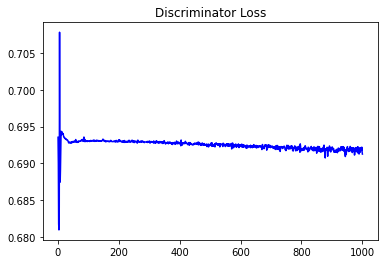

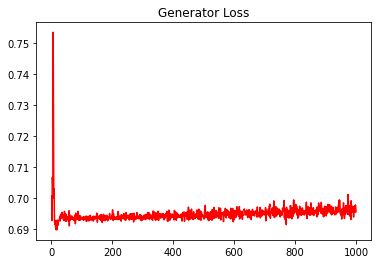

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07623748592078762


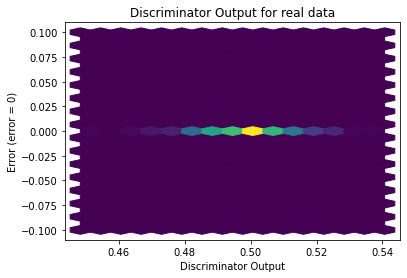

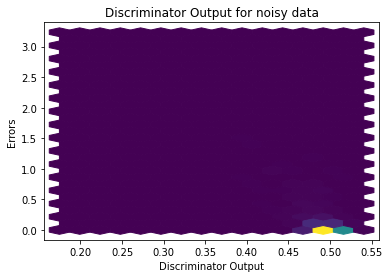

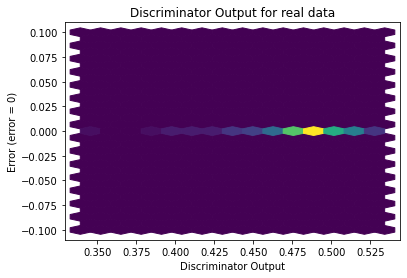

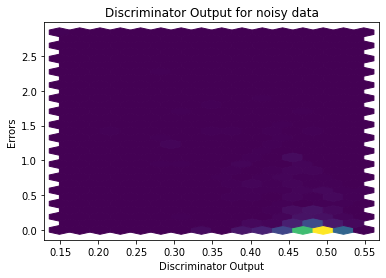

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


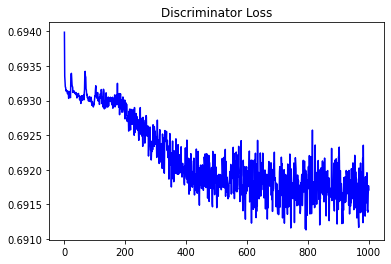

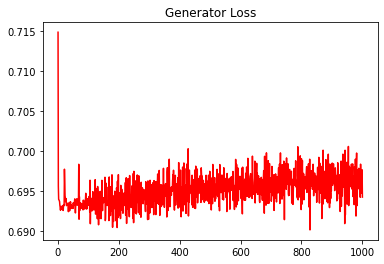

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06889876488580361


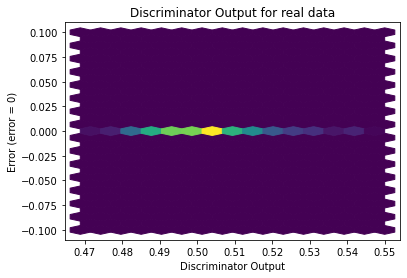

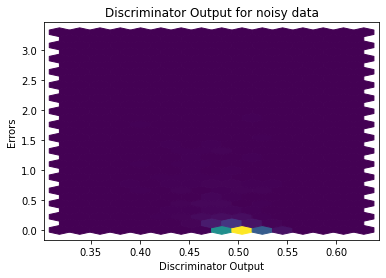

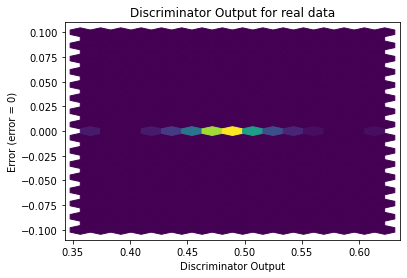

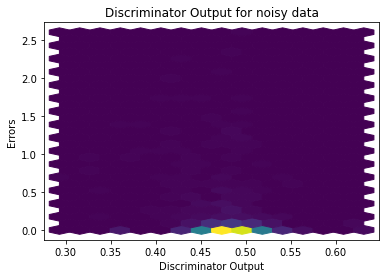

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2445]], requires_grad=True)
